In [1]:
import pandas as pd 
import numpy
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import platform, os, re, multiprocessing
import pandas as pd
import pyedflib
import mne
import matplotlib.pyplot as plt
import time  # Import the time module
import os 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy import stats
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy import stats
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
import mne
from mne.datasets import sample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mne.decoding import (
    CSP,
    GeneralizingEstimator,
    LinearModel,
    Scaler,
    SlidingEstimator,
    Vectorizer,
    cross_val_multiscore,
    get_coef,
)
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'/home/Duchuy220602/thesis/File_Feature_Pre/Scaled_File_total.csv')

In [3]:
X = df.iloc[:-1].drop(columns="Target")
y = df.iloc[:-1]["Target"]

smote = SMOTE(sampling_strategy = 'all',random_state=42)

sc = StandardScaler()

X = sc.fit_transform(X)

X, y = smote.fit_resample(X,y)

In [4]:
# Tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi y thành dạng số
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [6]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=60)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# X_train_pca = X_train
# X_test_pca = X_test

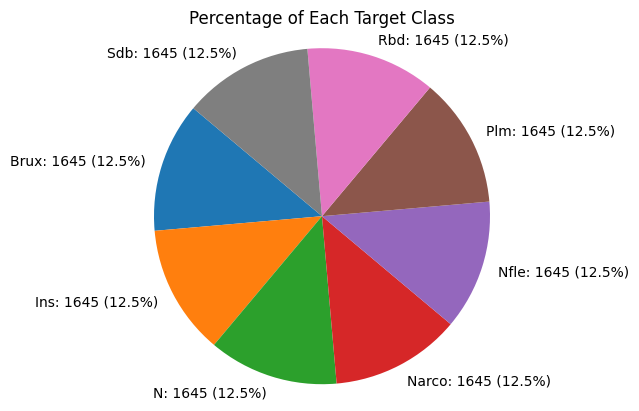

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is the given DataFrame
target_counts = df['Target'].value_counts()
total_rows = len(df)
target_percentages = target_counts / total_rows * 100

# Create labels with both percentage and count
labels = [f'{target_counts.index[i]}: {target_counts[i]} ({target_percentages[i]:.1f}%)' for i in range(len(target_counts))]

# Create a pie chart
plt.pie(target_percentages, labels=labels, autopct='', startangle=140)
plt.axis('equal')
plt.title('Percentage of Each Target Class')
plt.show()

In [8]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical


# Define parameter search space for Random Forest
search_space = {
    'n_estimators': Integer(1, 100),  # Number of trees
    'max_depth': Integer(1, 20),  # Maximum depth of each tree
    'max_features': Categorical(['sqrt', 'log2', None]),  # Number of features to consider at each split
    'min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 10)  # Minimum number of samples required to be at a leaf node
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the Bayesian search model with refined parameters
model = BayesSearchCV(estimator=rf, search_spaces=search_space, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Define parameter search space for Decision Tree
# search_space = {
#     'max_depth': Integer(1, 20),  # Maximum depth of the tree
#     'min_samples_split': Integer(2, 10),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': Integer(1, 10),  # Minimum number of samples required to be at a leaf node
#     'criterion': Categorical(['gini', 'entropy'])  # Function to measure the quality of a split
# }

# # Create a base model
# dt = DecisionTreeClassifier(random_state=42)

# # Instantiate the Bayesian search model with refined parameters and increased iterations
# model = BayesSearchCV(estimator=dt, search_spaces=search_space, n_iter=80, cv=5, n_jobs=-1, verbose=2, random_state=42)


In [9]:
model.fit(X_train_pca, y_train)

print(f"DONE")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=67; total time=  15.8s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=67; total time=  15.8s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=67; total time=  15.9s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=67; total time=  16.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=67; total time=  16.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=17, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=87; total time=  28.2s
[CV] END max_depth=17, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=87; total time=  28.2s
[CV] END max_depth=17, max_features=None, min_sample

In [10]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from collections import Counter
import numpy as np
# Use the best parameters to create the model
best_model = model.best_estimator_

In [11]:
# Evaluate the model using cross-validation to prevent overfitting
cv_scores = cross_val_score(best_model, X_train_pca, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.90646259 0.90362812 0.90130459 0.90981282 0.90414067]
Mean cross-validation score: 0.9050697571522465


In [12]:
y_hat = model.predict(X_test_pca)  # Use the model to make predictions

performance = pd.DataFrame({"Actual" : np.squeeze(y_test),
                            "Predicted" : y_hat})
performance.head(10)

,Actual,Predicted
0,3,3
1,2,2
2,0,0
3,6,2
4,4,4
5,2,2
6,3,3
7,7,7
8,2,2
9,1,4


In [13]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train_pca))
acc_val = accuracy_score(y_test, model.predict(X_test_pca))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 1.00
acc_val = 0.92


In [14]:
# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test.ravel(), y_pred)

print("Accuracy score: {:.2f}%".format(accuracy * 100))

Accuracy score: 92.24%


In [15]:
print(confusion_matrix(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print("Unique labels in test set:", np.unique(y_test))

print("Unique predicted labels:", np.unique(y_pred))

[[538   0   1   3   1   0   0   0]
 [  1 517   2   2   9   9   0   2]
 [  3   6 508   5   6   9   1   5]
 [  2   4   2 514   1  12   2   6]
 [  6  16  14  43 424  28   5   7]
 [  0   5   9   2   5 520   1   1]
 [  0  17  10  13  15  29 450   9]
 [  1   0   0   1   3   3   0 535]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       543
           1       0.92      0.95      0.93       542
           2       0.93      0.94      0.93       543
           3       0.88      0.95      0.91       543
           4       0.91      0.78      0.84       543
           5       0.85      0.96      0.90       543
           6       0.98      0.83      0.90       543
           7       0.95      0.99      0.97       543

    accuracy                           0.92      4343
   macro avg       0.92      0.92      0.92      4343
weighted avg       0.92      0.92      0.92      4343

Unique labels in test set: [0 1 2 3 4 5 6 7]
Unique predicted labels

In [16]:
# Print the best parameters
print(f"Best parameters found: {model.best_params_}")

# Use the best parameters to create the model
best_model = model.best_estimator_

# Save the model to a file using pickle
with open('/home/Duchuy220602/thesis/Model_2/best_RF_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model saved successfully.")

Best parameters found: OrderedDict([('max_depth', 20), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100)])
Model saved successfully.


In [17]:
import pickle
# Save Gradient Boosting model
with open('/home/Duchuy220602/thesis/Model_2/KNN.pkl', 'wb') as f:
    pickle.dump(model, f)

In [18]:
# Load the model from the .pkl file
import pickle
with open('/home/Duchuy220602/thesis/Model_2/KNN.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [19]:
# Step 2: Preprocess the CSV file data (if necessary)
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

data = df.iloc[:-1].drop(columns="Target")

# Upsample the data to have at least 1645 rows
current_rows = data.shape[0]
rows_needed = max(1645, current_rows)
repeat_factor = -(-rows_needed // current_rows)
upsampled_data = data.sample(frac=repeat_factor, replace=True)

# Preprocess the upsampled data using a standard scaler
scaler = StandardScaler()  
features_scaled = scaler.fit_transform(data)

# Apply PCA to scaled features
n_components = 60
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features_scaled)

# Make predictions using the loaded model and PCA-transformed features
predicted_pca = loaded_model.predict(features_pca)

# Calculate the percentage of each predicted class
class_counts_pca = Counter(predicted_pca)

total_samples_pca = len(predicted_pca)
for class_label, count in class_counts_pca.items():
    percentage_pca = (count / total_samples_pca) * 100
    print(f"Class {class_label}: {percentage_pca:.2f}%")

Class 0: 12.68%
Class 3: 13.23%
Class 1: 12.87%
Class 2: 12.24%
Class 4: 11.30%
Class 5: 13.75%
Class 6: 11.25%
Class 7: 12.69%


In [20]:
# import numpy as np

# # Assuming 'predictions' is your array
# predictions = loaded_model.predict(X)

# # Use numpy to get unique values and their counts
# unique, counts = np.unique(predictions, return_counts=True)

# # Print the counts of each unique value
# for value, count in zip(unique, counts):
#     print(f"Number {value}: {count} times")

In [21]:
# Step 3: Obtain the true labels
y = df.iloc[:-1]["Target"]

# Print the true labels
print("True Labels:", y)

True Labels: 0        Brux
1        Brux
2        Brux
3        Brux
4        Brux
         ... 
13154     Sdb
13155     Sdb
13156     Sdb
13157     Sdb
13158     Sdb
Name: Target, Length: 13159, dtype: object


In [22]:
# Step 4: Compare predictions with true labels
# Ensure predictions and true labels are numpy arrays for comparison
predictions = np.array(predicted_pca)
true_labels = np.array(y)

In [23]:
# If you want to see the count of each unique value in predictions and true labels
unique_predictions, counts_predictions = np.unique(predictions, return_counts=True)
unique_true_labels, counts_true_labels = np.unique(true_labels, return_counts=True)

print("Prediction counts:")
for value, count in zip(unique_predictions, counts_predictions):
    print(f"Number {value}: {count} times")

print("True label counts:")
for value, count in zip(unique_true_labels, counts_true_labels):
    print(f"Number {value}: {count} times")

Prediction counts:
Number 0: 1668 times
Number 1: 1693 times
Number 2: 1611 times
Number 3: 1741 times
Number 4: 1487 times
Number 5: 1809 times
Number 6: 1480 times
Number 7: 1670 times
True label counts:
Number Brux: 1645 times
Number Ins: 1645 times
Number N: 1645 times
Number Narco: 1645 times
Number Nfle: 1645 times
Number Plm: 1645 times
Number Rbd: 1645 times
Number Sdb: 1644 times


In [24]:
# import pickle
# from sklearn.ensemble import VotingClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# # Load each individual model
# with open('/home/Duchuy220602/thesis/Model_2/SVM.pkl', 'rb') as file:
#     svm_model = pickle.load(file)

# with open('/home/Duchuy220602/thesis/Model_2/BaggingClassifier.pkl', 'rb') as file:
#     bagging_model = pickle.load(file)

# with open('/home/Duchuy220602/thesis/Model_2/gradient_boosting_model.pkl', 'rb') as file:
#     gradient_model = pickle.load(file)

# # Create a Voting Classifier with the individual models
# voting_model = VotingClassifier(
#     estimators=[
#         ('svm', svm_model),
#         ('bagging', bagging_model),
#         ('gradient', gradient_model)
#     ],
#     voting='hard'  # Use 'hard' for classification and 'soft' for probability averaging
# )

# # Save the ensemble model
# with open('/home/Duchuy220602/thesis/Model_2/ensemble_model.pkl', 'wb') as file:
#     pickle.dump(voting_model, file)